

# Project: Investigate a Movie Dataset  from the Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The movie data set is a data set that crries information of several movies from the year 1965 to 2015. thet data set has 10866 and 25 rows.
For this project, I will be investigating the dataset to see the movie with the highest number of viewers based on the number of vote each movie got, then check if there is a relationship between the vote_count and the popularity and the year the movie was released. Also, I will be investigating the revenue of the movies to check the movie with the highest revenue and then check to see if the popularity is related to the revenue generated.

In [1]:
#Set up import statement to import all the package I intend to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.lib.histograms import histogram
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

For data wrangling process, I will load the dataset to be used for the analysis, then physically inspect the data for missing values, data type, and duplicates.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#explode the moduled up genres colums to clearly see all the genre
df_movies['genres'].explode()

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10866, dtype: object

In [4]:
#split the feature in the genres column and make them new columns
df_movies[['genres','genres1','genres2','genres3','genres4']] = df_movies['genres'].str.split('|', expand=True)
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres1,genres2,genres3,genres4
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Crime,Thriller,None,None


In [5]:
#Inspect the number of rows and columns
df_movies.shape

(10866, 25)

In [7]:
#Inspect the column header to determine which variable is necessary for your annalysis
df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'genres1', 'genres2', 'genres3', 'genres4'],
      dtype='object')

**Observation:** From the column header inspection, I will be needing just a few columns, hence, I will be decongesting the data set by removing columns that are not necessary for this analysis.

In [8]:
#Inspect the data set to see the type of data in each column and number of column with  missin values
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**Observation** From the info, you can tell the the data set has missing  values which will be dentrimental to the success of our analysis, so before the analysis, something must be done about the missing data.

In [9]:
#Inspect the columns with null values to determine the number of missing values
df_movies.isnull().sum()

id                          0
imdb_id                    10
popularity                  0
budget                      0
revenue                     0
original_title              0
cast                       76
homepage                 7930
director                   44
tagline                  2824
keywords                 1493
overview                    4
runtime                     0
genres                     23
production_companies     1030
release_date                0
vote_count                  0
vote_average                0
release_year                0
budget_adj                  0
revenue_adj                 0
genres1                  2351
genres2                  5787
genres3                  8885
genres4                 10324
dtype: int64

In [10]:
#Inspect the data set for duplicate rows
df_movies.duplicated().sum()

1

In [11]:
#check for rows with duplicated title
df_movies[df_movies['original_title'].duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres1,genres2,genres3,genres4
1133,281778,tt3297792,0.188264,0,0,Survivor,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,http://www.arrowstormentertainment.com/#!survi...,John Lyde,Alone. Stranded. Deadly,...,7/22/14,23,4.9,2014,0.000000e+00,0.000000e+00,Action,Fantasy,None,None
1194,296626,tt3534842,0.132764,0,0,Finders Keepers,Jaime Pressly|Kylie Rogers|Tobin Bell|Patrick ...,NaN,Alexander Yellen,NaN,...,10/18/14,33,4.8,2014,0.000000e+00,0.000000e+00,Thriller,Horror,None,None
1349,42222,tt0076245,0.398651,0,0,Julia,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,NaN,Fred Zinnemann,"Through It All, Friendship Prevailed.",...,10/2/77,10,5.0,1977,0.000000e+00,0.000000e+00,None,None,None,None
1440,7445,tt0765010,1.223786,26000000,43318349,Brothers,Tobey Maguire|Jake Gyllenhaal|Natalie Portman|...,NaN,Jim Sheridan,There are two sides to every family.,...,1/27/09,381,6.7,2009,2.642641e+07,4.402879e+07,Thriller,War,None,None
1513,62320,tt1014762,0.688361,0,0,Home,Glenn Close|Yann Arthus-Bertrand|Jacques Gambl...,http://www.homethemovie.org/,Yann Arthus-Bertrand,A Stunning Visual Portrayal of Earth,...,6/3/09,109,7.8,2009,0.000000e+00,0.000000e+00,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,39995,tt0079482,0.047645,0,0,Long Weekend,John Hargreaves|Briony Behets|Mike McEwen|Roy ...,NaN,Colin Eggleston,Their crime was against nature. Nature found t...,...,10/14/78,17,6.1,1978,0.000000e+00,0.000000e+00,Thriller,Mystery,None,None
10827,2661,tt0060153,0.410366,1377800,0,Batman,Adam West|Burt Ward|Cesar Romero|Burgess Mered...,NaN,Leslie H. Martinson,He's Here Big As Life In A Real Bat-Epic,...,7/30/66,99,5.9,1966,9.256081e+06,0.000000e+00,Adventure,Comedy,Science Fiction,Crime
10849,28270,tt0060445,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,NaN,Ronald Neame,Shirley MacLaine raises Michael Caine!,...,12/16/66,14,6.1,1966,0.000000e+00,0.000000e+00,Comedy,Crime,None,None
10853,15598,tt0060086,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin...,NaN,Lewis Gilbert,Is any man an Alfie? Ask any girl!,...,3/29/66,26,6.2,1966,0.000000e+00,0.000000e+00,Drama,Romance,None,None


**Observation** As you can from the code above, there are 295 rows with with a movie title that appear more than once and there is a row that has its content to be repeated. These rows will be droped in the cleaning phase.

In [12]:
#Inspect the data for number of unique values in the each columns
df_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                     20
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
genres1                    20
genres2                    20
genres3                    20
genres4                    19
dtype: int64

The data wrangling phase is completed and we have a series cleaning process to carry out to prepare our data for exploration. For the cleaning processing, I will:
> decongest the data set by dropping id', 'imdb_id','cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj',
       'revenue_adj',
>drop duplicated titles, rows with their revenue and budget being 0 and rows with missing values and
> change the date data type from string to datetime data type.

### Data Cleaning 

In [13]:
#Remove the columns not required for this analysis and
# View the new data set to see if you sucessfully dropped them
df_moviesnew = df_movies.drop(['id', 'imdb_id','cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj',
       'revenue_adj'], axis=1)
df_moviesnew.shape


(10866, 15)

**Observation** The new table is now saved as df_moviesnew and it has just 15 columns and 10866 rows

In [14]:
#Drop the rows in the data set that have their budget and revenue to be zero
df_moviesnew = df_moviesnew[(df_moviesnew.revenue != 0) & (df_moviesnew.budget != 0)]

**Observation** I have dropped the rows that meets the condition set above, to confirm that the rows have been dropped, we wil use the shape function to see how many row we left with

In [15]:
#check the structure of the new dataset
df_moviesnew.shape

(3855, 15)

**Observation** Now, its confirmed that we have dropped some rows and our new dataset has 3855 rows and 15 columns, however lets not forget we have a duplicate row. 

**Remove duplicate rows including the rows with duplicated title**

In [16]:
#remove row with duplicated data
df_moviesnew = df_moviesnew.drop_duplicates()
df_moviesnew.duplicated().sum()

0

In [17]:
#check the number of rows with duplicated title
df_movietitle_dup = df_moviesnew[df_moviesnew['original_title'].duplicated() == True]
df_movietitle_dup.original_title.count()

46

In [18]:
#create a function to drop row with duplicated title and then drop the rows
df_dup = df_movietitle_dup['original_title'].index

def drop_title_dup(Dframe,row_cols, axis=0):
    Dframe.drop(row_cols, axis=axis, inplace=True)
    
drop_title_dup(df_moviesnew,df_dup, axis=0)

In [19]:
#again check the shape to confirm if you have drope the rows
df_moviesnew.shape

(3808, 15)

**Observation** Now we have dropped dupplicate rows, as we can see there are no more duplicates. Also we can check if there are still null values in our dataset

In [20]:
#Check for null values
df_moviesnew.isnull().sum()

popularity           0
budget               0
revenue              0
original_title       0
director             1
runtime              0
genres               0
release_date         0
vote_count           0
vote_average         0
release_year         0
genres1            641
genres2           1725
genres3           2950
genres4           3553
dtype: int64

In [21]:
#converting the release_date data type from string to datetime datatype
df_moviesnew['release_date'] = pd.to_datetime(df_moviesnew['release_date'])

In [22]:
#check the info to confirm you have changed the date data type
df_moviesnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3808 non-null   float64       
 1   budget          3808 non-null   int64         
 2   revenue         3808 non-null   int64         
 3   original_title  3808 non-null   object        
 4   director        3807 non-null   object        
 5   runtime         3808 non-null   int64         
 6   genres          3808 non-null   object        
 7   release_date    3808 non-null   datetime64[ns]
 8   vote_count      3808 non-null   int64         
 9   vote_average    3808 non-null   float64       
 10  release_year    3808 non-null   int64         
 11  genres1         3167 non-null   object        
 12  genres2         2083 non-null   object        
 13  genres3         858 non-null    object        
 14  genres4         255 non-null    object        
dtypes: 

**Observation** Voila! our data is free from duplicates and null values. Also the data types are corrected,hence our data is clean and free from dirt.


<a id='eda'></a>
## Exploratory Data Analys

### Research Question 1: Exploring the dataset to detect the highest revenue generated from the movies and then determine if there is a relationship between the popilarity and the revenue

In [23]:
# Group the movies by year in descending order by revenue and check the corellation between popularity and revenue
df_yearly_revenue = df_moviesnew.groupby(['original_title', 'release_year', 'genres1', 'genres2', 'genres3', 'genres4'])[['popularity','revenue']].sum().sort_values(ascending=False, by='revenue')
df_yearly_revenue.head(20)

,,,,,,popularity,revenue
original_title,release_year,genres1,genres2,genres3,genres4,,
The Net,1995,Drama,Mystery,Thriller,Action,1.136610,1106279658
Shrek 2,2004,Animation,Comedy,Family,Fantasy,2.191033,919838758
Inception,2010,Thriller,Science Fiction,Mystery,Adventure,9.363643,825500000
Shrek the Third,2007,Adventure,Animation,Comedy,Family,1.862295,798958165
Maleficent,2014,Adventure,Action,Family,Romance,3.582315,758410378
Shrek Forever After,2010,Adventure,Fantasy,Animation,Family,1.820934,752600867
Big Hero 6,2014,Family,Animation,Action,Comedy,8.691294,652105443
The Incredibles,2004,Adventure,Animation,Family,Science Fiction,3.339406,631442092
How to Train Your Dragon 2,2014,Action,Adventure,Animation,Comedy,3.489106,609123048


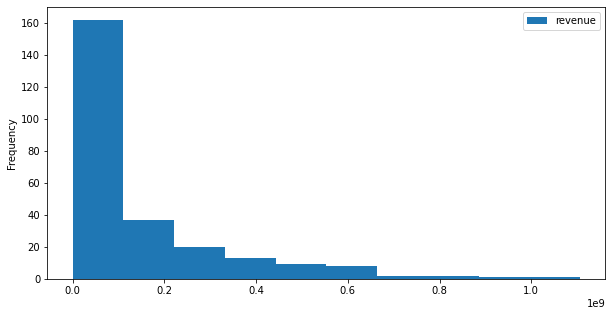

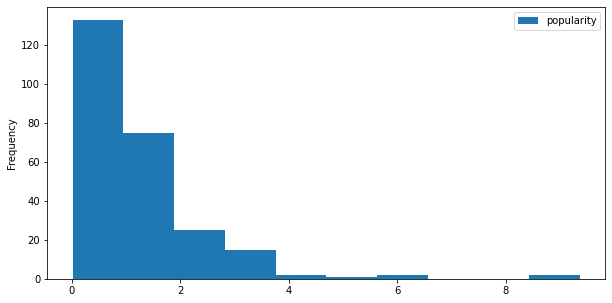

In [24]:
#create a distribution plot for popularity and revenue
df_yearly_revenue.plot.hist(x='popularity', figsize=(10,5)); df_yearly_revenue.plot.hist(x='revenue', figsize=(10, 5));

In [25]:
df_yearly_revenue.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,255.0,1.239693e+00,1.199511e+00,0.018196,4.790435e-01,9.003420e-01,1.582665e+00,9.363643e+00
revenue,255.0,1.438909e+08,1.894373e+08,3.000000,1.788987e+07,6.913186e+07,2.002002e+08,1.106280e+09


In [26]:
df_yearly_revenue.median()

popularity    9.003420e-01
revenue       6.913186e+07
dtype: float64

In [28]:
df_yearly_revenue.mode().sum()

popularity    3.161218e+02
revenue       3.669218e+10
dtype: float64

In the histogram of vote_count and popularity skewed to the right, the value of mode is to the left of the value of the median, i.e., the peak of the graph. And, most of the observations fall on the right side of the graph, therefore the value of mean comes to the right of the median. Therefore, the relation between the mean, median, and mode is Mean > Median > Mode.

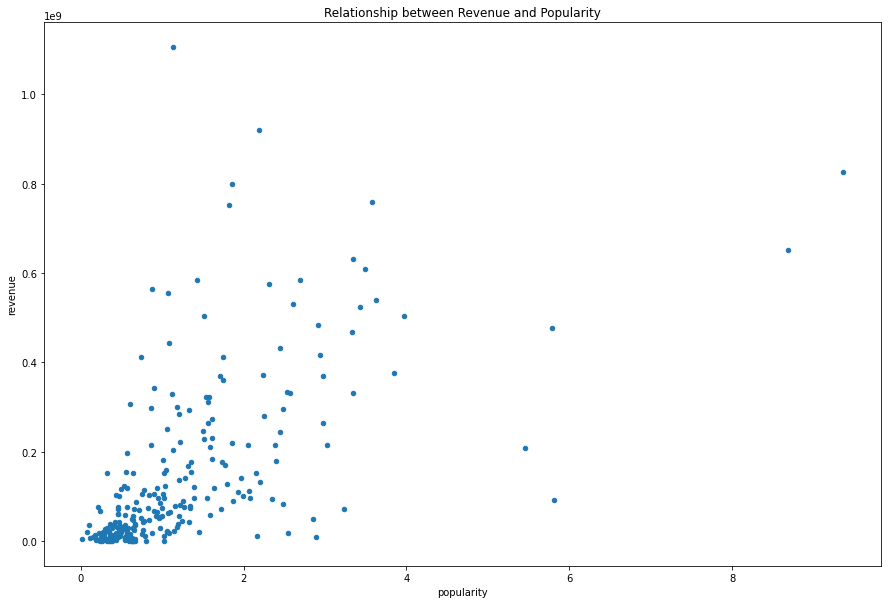

In [29]:
df_yearly_revenue.plot(kind='scatter', title='Relationship between Revenue and Popularity', x='popularity', y='revenue', figsize=(15, 10));

**The scatterplot above shows that there is a strong relationship between the popularity and the revenugenerated**

### Research Question 2: Identifying the movie with the highest number of viewers over the years based on the the number of votes and the features of the movie and then determine the relationship between the **popularity** and the **vote count**

In [30]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_movie_votecount = df_moviesnew.groupby(['original_title', 'release_year', 'genres', 'runtime', 'revenue', 'popularity'])['vote_count'].mean().sort_values(ascending=False).to_frame().reset_index()[:20]
df_movie_votecount

,original_title,release_year,genres,runtime,revenue,popularity,vote_count
0,Inception,2010,Action,148,825500000,9.363643,9767.0
1,The Avengers,2012,Science Fiction,143,1519557910,7.637767,8903.0
2,Avatar,2009,Action,162,2781505847,9.432768,8458.0
3,The Dark Knight,2008,Drama,152,1001921825,8.466668,8432.0
4,Django Unchained,2012,Drama,165,425368238,5.944518,7375.0
5,The Hunger Games,2012,Science Fiction,142,691210692,2.571099,7080.0
6,Iron Man 3,2013,Action,130,1215439994,4.946136,6882.0
7,The Dark Knight Rises,2012,Action,165,1081041287,6.591277,6723.0
8,Interstellar,2014,Adventure,169,621752480,24.949134,6498.0
9,The Hobbit: An Unexpected Journey,2012,Adventure,169,1017003568,4.218933,6417.0


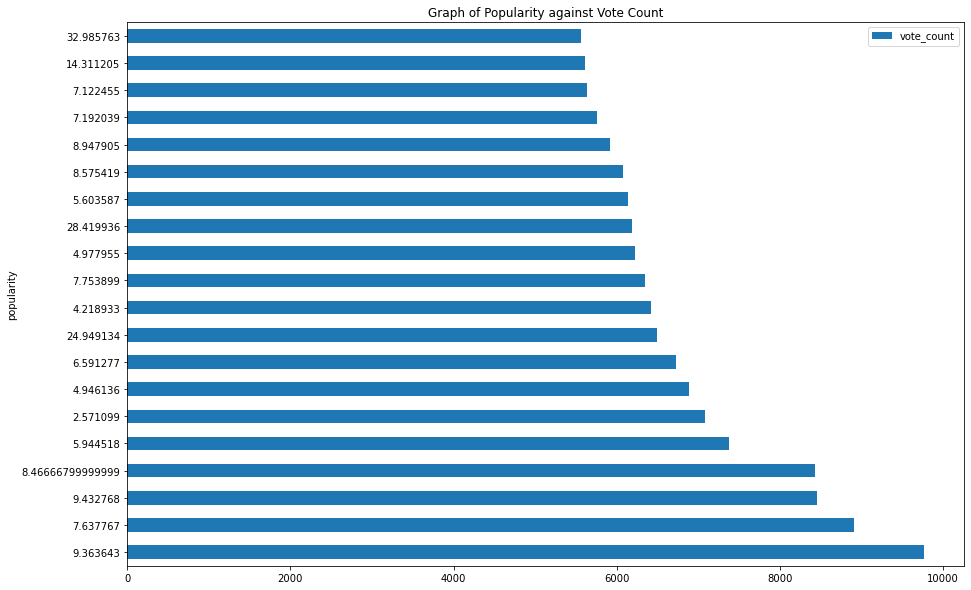

In [31]:
df_movie_votecount.plot(kind='barh', title='Graph of Popularity against Vote Count', x='popularity', y='vote_count', figsize=(15,10));

**Observation:** Apparently the movie with the highest viewers is Inception which was released in 2010 and as shown by the bar chart, there is an iregular relationship between the popularity and the vote count, i.e., the popularity does not influence the vote count.

<a id='conclusions'></a>
## Conclusions

> The investigation into the movie data set is now conluded, the rows of the movies were reduced from 10866 to 3808 and the columns also were reduced to 15 columns during the cleaning the phase of the project. The project basically centred on determining the movie with the highes revenue and the most viewed movie based on vote counts over the 50 years considered and then check the relationship between Popularity and Revenue, vote count.
After the exploration, I noticed there is a strong relationship between the popularity of a movie and the revenue generated, how ever, there is an irregular relationship whent matched with the vote count.
However, ohter questions can be postulated from the dataset and answered but as it can be clearly seen, the number of dropped rows apparently caused have caused us a bias, as more than half of the rows were dropped.